# Red Neuronal Densa (Perceptrón Multicapa MLP)

Paso 1. Correr paqueterías

In [910]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

Paso 2. Corre el siguiente bloque con diferentes funciones de activación

In [911]:
# Funciones de activacion
def linear(z, derivative=False):
    a = z 
    if derivative:
        da = 1
        return a, da
    return a

def sigmoid(z, derivative=False):
    a = 1 / (1 + np.exp(-z))
    if derivative:
        da = a * (1 - a)
        return a, da
    return a

def tanh(z, derivative=False):
    a = np.tanh(z)
    if derivative:
        da = (1 - a) * (1 + a)
        return a, da
    return a

def relu(z, derivative=False):
    a = z * (z >= 0)
    if derivative:
        da = np.array(z >= 0, dtype=float)
        return a, da
    return a

Paso 3. Completa la siguiente red para programar la red densa

In [912]:
class MLP():
    def __init__(self, layers_dims, hidden_activation=relu, output_activation=sigmoid, learning_rate=0.1):
        
        # Instanciar atributos
        self.L = len(layers_dims) - 1
        self.w = [None]
        self.b = [None]
        self.f = [None]
        self.layers = layers_dims
        self.eta = learning_rate
        
        # Inicializar pesos
        for l in range(1, self.L+1):
            self.w.append(-1 + 2 * np.random.rand(self.layers[l], self.layers[l-1]))
            self.b.append(-1 + 2 * np.random.rand(self.layers[l], 1))
            
            if l == self.L:
                self.f.append(output_activation)
            else:
                self.f.append(hidden_activation)
                
    def predict(self, X):
        A = X.copy()
        for l in range(1, self.L+1):
            A = self.f[l](self.w[l] @ A + self.b[l])
        return A
    
    def fit(self, X, Y, epochs=500):
        # Numero de muestras 
        p = X.shape[1]
        
        # Descenso del gradiente
        for _ in range(epochs):
            # Inicializar activaciones y sus derivadas
            As = []
            dA = [None]
            lg = [None] * (self.L + 1)
            
            # Propagacion
            A = X.copy()
            As.append(A)
            for l in range(1, self.L+1):
                A, da = self.f[l](self.w[l] @ A + self.b[l], derivative=True)
                As.append(A)
                dA.append(da)
                
            # Backpropagation
            for l in range(self.L, 0, -1):
                if l == self.L:
                    lg[l] = (Y - As[l]) * dA[l]
                else:
                    lg[l] = (self.w[l+1].T @ lg[l+1]) * dA[l]
                    
            # Actualizar parametros
            for l in range(1, self.L+1): 
                self.w[l] += self.eta/p * (lg[l] @ As[l-1].T)
                self.b[l] += self.eta/p * np.sum(lg[l], axis=1, keepdims=True)

Paso 4. Ejecuta la siguiente linea que te ayudará a dibujar las predicciones de la red

In [913]:
def MLP_binary_classification_2d(X, Y, net):
    # Graficar los puntos
    plt.scatter(X[0, :], X[1, :], c=Y[0], cmap='bwr')
    # Crear malla de puntos
    xmin, ymin = np.min(X, axis=1) - 0.5
    xmax, ymax = np.max(X, axis=1) + 0.5
    xx, yy = np.meshgrid(np.linspace(xmin, xmax, 100),
                         np.linspace(ymin, ymax, 100))
    # Checar si el modelo es de sklearn para darle el formato de entrada adecuado
    if hasattr(net, "max_iter"):
        xx = xx.T
        yy = yy.T
        data = np.c_[xx.ravel(), yy.ravel()]
    else:
        data = [xx.ravel(), yy.ravel()]
    # Predecir para cada punto de la malla
    zz = net.predict(data).reshape(xx.shape)
    # Pintar contornos
    plt.contourf(xx, yy, zz, alpha=0.4, cmap='bwr')
    #plt.xlim([xmin, xmax])
    #plt.ylim([ymin, ymax])
    plt.grid()

Paso 5. Crea los datos para la compuerta XOR

In [914]:
X = np.array([[0, 0, 1, 1],
              [0, 1, 0, 1]])
Y = np.array([[0, 1, 1, 0]])

Paso 6. Corre el siguiente código para ver la predicción de la red antes de entrenar

[[0.89050067 0.97733458 0.6182547  0.8858301 ]]


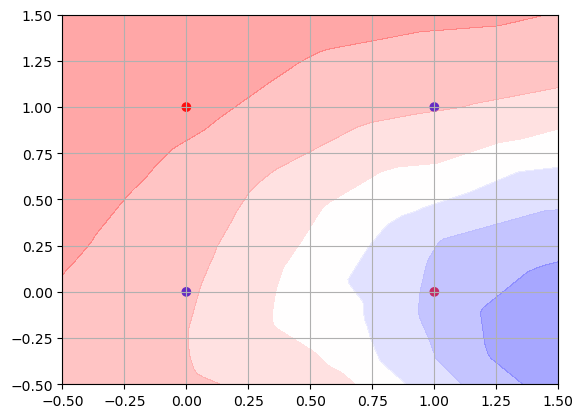

In [915]:
net = MLP((2, 50, 1), learning_rate=0.2)
print(net.predict(X))
MLP_binary_classification_2d(X, Y, net)

Paso 7. Repite el código anterior pero agrega el entrenamiento

[[0.10414766 0.90243171 0.90573212 0.09423904]]


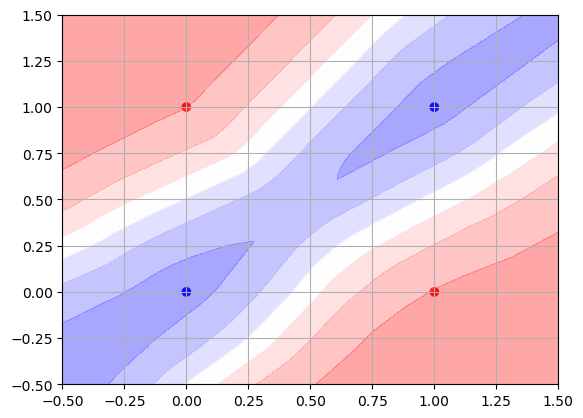

In [916]:
net.fit(X, Y)
print(net.predict(X))
MLP_binary_classification_2d(X, Y, net)

Paso 8. Crea una red neuronal, y entrenala para el dataset 'blobs.csv', dibuja tus resultados al igual que el problema XOR

In [917]:
# Cargar el dataset
blobs = pd.read_csv("Datasets/blobs.csv")
blobs.head()

,x1,x2,y
0,-1.492607,-0.479773,1.0
1,0.321227,2.057072,0.0
2,-1.378621,-0.154890,1.0
3,-1.579172,-1.987527,1.0
4,0.914502,0.526078,0.0


In [918]:
# Estadisticas del dataset (para ver si es necesario escalar)
blobs.describe()  # No es necesario escalar ya que x1 y x2 tienen rangos similares

,x1,x2,y
count,1000.000000,1000.000000,1000.000000
mean,0.034977,0.045376,0.497000
std,1.336475,1.568444,0.500241
min,-3.240986,-4.637876,0.000000
25%,-1.027161,-1.125180,0.000000
50%,-0.034481,0.187561,0.000000
75%,1.059276,1.152293,1.000000
max,4.023667,4.214555,1.000000


In [919]:
# Preparacion de los datos
# Separar features de targets
X = blobs.iloc[:, :2].to_numpy()
Y = blobs.iloc[:, 2:].to_numpy()

# Transponer X y Y para que tengan la forma adecuada 
X = X.T
Y = Y.T

p = X.shape[1]
idx = np.random.permutation(p)
n_train = int(p * 0.8)  # 80% entrenamiento, 20% prueba
X_train_blobs = X[:, idx[:n_train]]
Y_train_blobs = Y[:, idx[:n_train]]
X_test_blobs = X[:, idx[n_train:]]
Y_test_blobs = Y[:, idx[n_train:]]

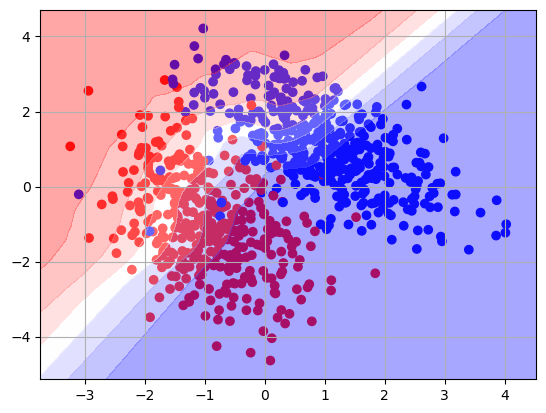

In [920]:
# Crear red y predecir sin entrenar
net_blobs = MLP((2, 30, 1))
MLP_binary_classification_2d(X_train_blobs, Y_train_blobs, net_blobs)

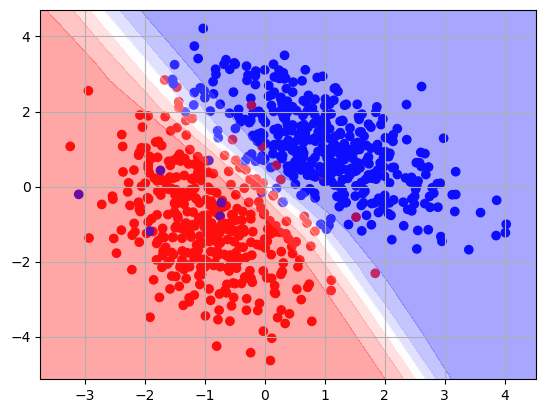

In [921]:
# Entrenar la red y predecir
net_blobs.fit(X_train_blobs, Y_train_blobs)
MLP_binary_classification_2d(X_train_blobs, Y_train_blobs, net_blobs)

In [922]:
# Calcular el accuracy sobre el set de prueba
Y_pred_blobs = net_blobs.predict(X_test_blobs) >= 0.5  # Agregar umbral de 0.5
acc_blobs = np.mean(Y_pred_blobs==Y_test_blobs)
print(f"El accuracy del modelo para blobs es de {acc_blobs}")

El accuracy del modelo para blobs es de 0.98


Paso 9. Crea una red neuronal, y entrenala para el dataset 'moons.csv', dibuja tus resultados al igual que el problema XOR

In [923]:
# Cargar el dataset
moons = pd.read_csv("Datasets/moons.csv")
moons.head()

,x1,x2,y
0,0.696510,0.327415,0.0
1,1.882256,-0.015026,1.0
2,1.623633,-0.088585,1.0
3,-0.110615,0.170684,1.0
4,0.007738,0.046331,1.0


In [924]:
# Estadisticas del dataset (para ver si es necesario escalar)
moons.describe()  # No es necesario escalar ya que x1 y x2 tienen rangos similares

,x1,x2,y
count,1000.000000,1000.000000,1000.00000
mean,0.496302,0.249776,0.50000
std,0.887938,0.536517,0.50025
min,-1.393453,-0.883829,0.00000
25%,-0.107871,-0.188070,0.00000
50%,0.493165,0.254810,0.50000
75%,1.109368,0.668676,1.00000
max,2.426912,1.609534,1.00000


In [925]:
# Preparacion de los datos
# Separar features de targets
X = moons.iloc[:, :2].to_numpy()
Y = moons.iloc[:, 2:].to_numpy()

# Transponer X y Y para que tengan la forma adecuada 
X = X.T
Y = Y.T

p = X.shape[1]
idx = np.random.permutation(p)
n_train = int(p * 0.8)  # 80% entrenamiento, 20% prueba
X_train_moons = X[:, idx[:n_train]]
Y_train_moons = Y[:, idx[:n_train]]
X_test_moons = X[:, idx[n_train:]]
Y_test_moons = Y[:, idx[n_train:]]

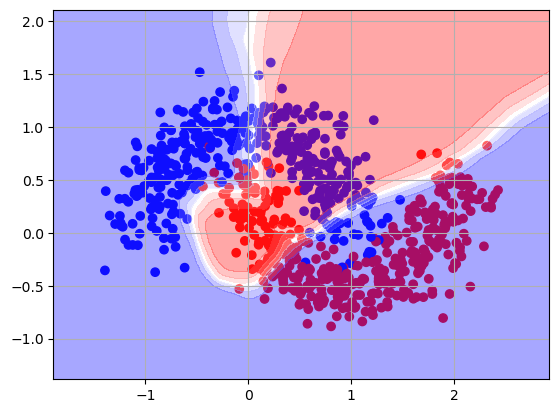

In [926]:
# Crear red y predecir sin entrenar
net_moons = MLP((2, 80, 40, 20, 1))
MLP_binary_classification_2d(X_train_moons, Y_train_moons, net_moons)

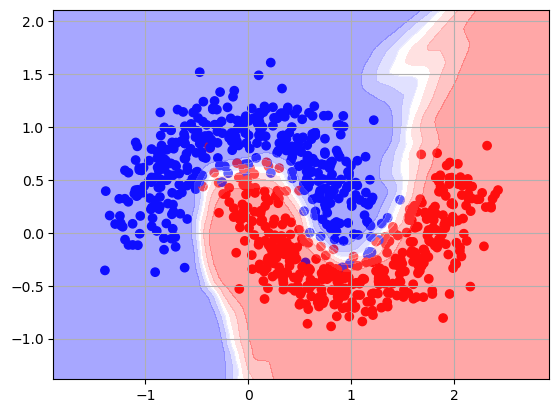

In [927]:
# Entrenar la red y predecir
net_moons.fit(X_train_moons, Y_train_moons)
MLP_binary_classification_2d(X_train_moons, Y_train_moons, net_moons)

In [928]:
# Calcular el accuracy sobre el set de prueba
Y_pred_moons = net_moons.predict(X_test_moons) >= 0.5  # Agregar umbral de 0.5
acc_moons = np.mean(Y_pred_moons==Y_test_moons)
print(f"El accuracy del modelo para moons es de {acc_moons}")

El accuracy del modelo para moons es de 0.93


Paso 10. Crea una red neuronal, y entrenala para el dataset 'circles.csv', dibuja tus resultados al igual que el problema XOR

In [929]:
# Cargar el dataset
circles = pd.read_csv("Datasets/circles.csv")
circles.head()

,x1,x2,y
0,-0.853570,-0.716939,0.0
1,0.302515,0.035576,1.0
2,-0.787124,0.401752,0.0
3,-0.336760,0.807889,0.0
4,-0.157904,0.215519,1.0


In [930]:
# Estadisticas del dataset (para ver si es necesario escalar)
circles.describe()  # No es necesario escalar ya que x1 y x2 tienen rangos similares

,x1,x2,y
count,1000.000000,1000.000000,1000.00000
mean,0.006402,-0.009939,0.50000
std,0.554270,0.548380,0.50025
min,-1.453770,-1.416033,0.00000
25%,-0.297847,-0.323384,0.00000
50%,0.004466,-0.023753,0.50000
75%,0.329594,0.306372,1.00000
max,1.743735,1.372690,1.00000


In [931]:
# Preparacion de los datos
# Separar features de targets
X = circles.iloc[:, :2].to_numpy()
Y = circles.iloc[:, 2:].to_numpy()

# Transponer X y Y para que tengan la forma adecuada 
X = X.T
Y = Y.T

p = X.shape[1]
idx = np.random.permutation(p)
n_train = int(p * 0.8)  # 80% entrenamiento, 20% prueba
X_train_circles = X[:, idx[:n_train]]
Y_train_circles = Y[:, idx[:n_train]]
X_test_circles = X[:, idx[n_train:]]
Y_test_circles = Y[:, idx[n_train:]]

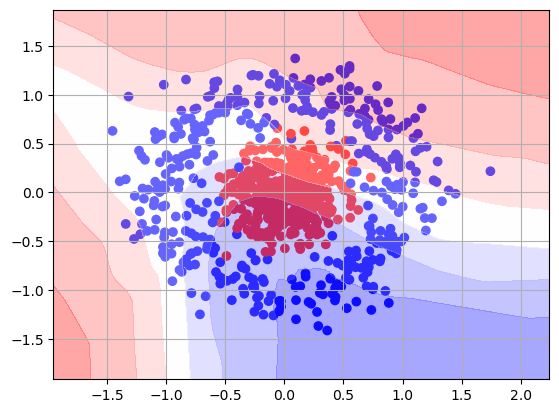

In [932]:
# Crear red y predecir sin entrenar
net_circles = MLP((2, 50, 1))
MLP_binary_classification_2d(X_train_circles, Y_train_circles, net_circles)

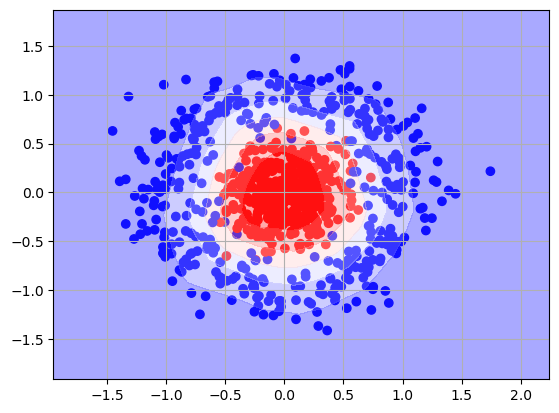

In [933]:
# Entrenar la red y predecir
net_circles.fit(X_train_circles, Y_train_circles)
MLP_binary_classification_2d(X_train_circles, Y_train_circles, net_circles)

In [934]:
# Calcular el accuracy sobre el set de prueba
Y_pred_circles = net_circles.predict(X_test_circles) >= 0.5  # Agregar umbral de 0.5
acc_circles = np.mean(Y_pred_circles==Y_test_circles)
print(f"El accuracy del modelo para circles es de {acc_circles}")

El accuracy del modelo para circles es de 0.96


Paso 11. Puedes usar bibliotecas como sklearn para usar esta red neuronal ([referencia](https://scikit-learn.org/stable/modules/generated/sklearn.neural_network.MLPClassifier.html)). En el siguiente código usa cualquiera de los dataset anteriores para entrenar un clasificador (puedes usar un regresor importando sklearn.neural_network.MLPRegressor)

A continuación, se entrena un modelo de MLP de sklearn para cada uno de los datasets y se muestra el grafico de sus predicciones así como su accuracy sobre el set de prueba para comparalo con el modelo from-scratch

In [935]:
from sklearn.neural_network import MLPClassifier

# Las arquitecturas se eligen igual que las de from-scratch
sk_blobs = MLPClassifier((30,))
sk_moons = MLPClassifier((80, 40, 20, ))
sk_circles = MLPClassifier((50, ))

# Entrenar cada modelo
sk_blobs.fit(X_train_blobs.T, Y_train_blobs.ravel())
sk_moons.fit(X_train_moons.T, Y_train_moons.ravel())
sk_circles.fit(X_train_circles.T, Y_train_circles.ravel())

acc_sk_blobs = sk_blobs.score(X_test_blobs.T, Y_test_blobs.ravel())
acc_sk_moons = sk_moons.score(X_test_moons.T, Y_test_moons.ravel())
acc_sk_circles = sk_circles.score(X_test_circles.T, Y_test_circles.ravel())

print(f"El accuracy de sklearn para blobs es de {acc_sk_blobs}")
print(f"El accuracy de sklearn para moons es de {acc_sk_moons}")
print(f"El accuracy de sklearn para circles es de {acc_sk_circles}")

El accuracy de sklearn para blobs es de 0.985
El accuracy de sklearn para moons es de 0.935
El accuracy de sklearn para circles es de 0.97


/Users/isaacg/anaconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


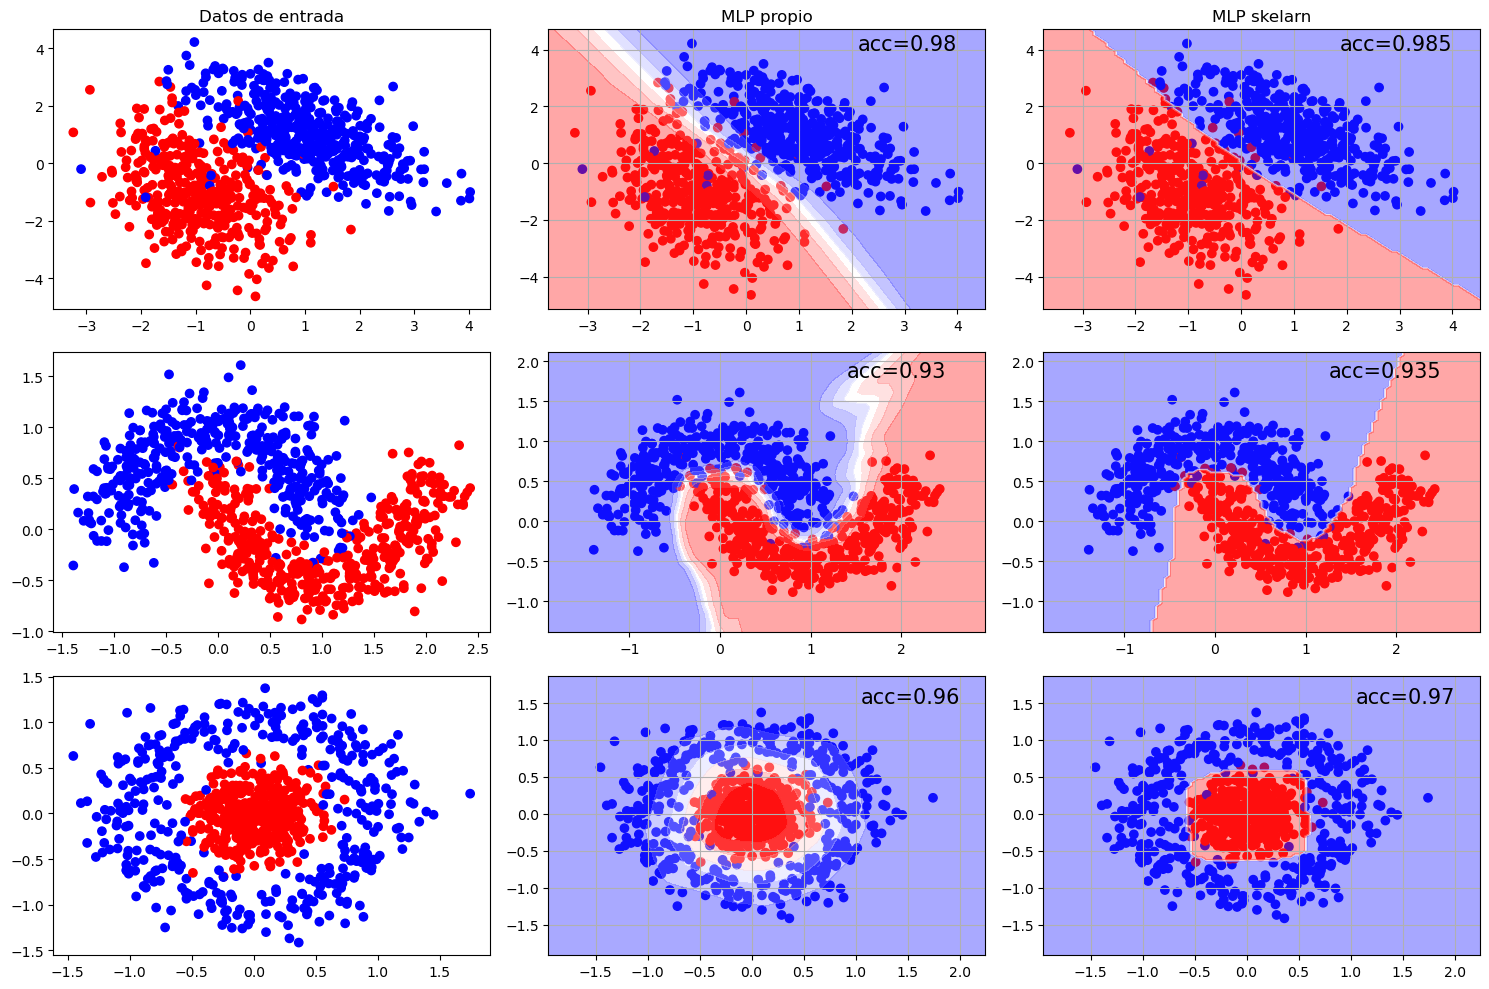

In [936]:
fig = plt.figure(figsize=(15,10))

plt.subplot(3, 3,  1)
plt.scatter(X_train_blobs[0, :], X_train_blobs[1, :], c=Y_train_blobs[0], cmap='bwr')
plt.title("Datos de entrada")

plt.subplot(3, 3, 2)
MLP_binary_classification_2d(X_train_blobs, Y_train_blobs, net_blobs)
plt.title("MLP propio")
plt.text(4, 4, f"acc={acc_blobs}", size=15, horizontalalignment="right")

plt.subplot(3, 3, 3)
MLP_binary_classification_2d(X_train_blobs, Y_train_blobs, sk_blobs)
plt.title("MLP skelarn")
plt.text(4, 4, f"acc={acc_sk_blobs}", size=15, horizontalalignment="right")

plt.subplot(3, 3, 4)
plt.scatter(X_train_moons[0, :], X_train_moons[1, :], c=Y_train_moons[0], cmap='bwr')

plt.subplot(3, 3, 5)
MLP_binary_classification_2d(X_train_moons, Y_train_moons, net_moons)
plt.text(2.5, 1.8, f"acc={acc_moons}", size=15, horizontalalignment="right")

plt.subplot(3, 3, 6)
MLP_binary_classification_2d(X_train_moons, Y_train_moons, sk_moons)
plt.text(2.5, 1.8, f"acc={acc_sk_moons}", size=15, horizontalalignment="right")

plt.subplot(3, 3, 7)
plt.scatter(X_train_circles[0, :], X_train_circles[1, :], c=Y_train_circles[0], cmap='bwr')

plt.subplot(3, 3, 8)
MLP_binary_classification_2d(X_train_circles, Y_train_circles, net_circles)
plt.text(2, 1.5, f"acc={acc_circles}", size=15, horizontalalignment="right")

plt.subplot(3, 3, 9)
MLP_binary_classification_2d(X_train_circles, Y_train_circles, sk_circles)
plt.text(2, 1.5, f"acc={acc_sk_circles}", size=15, horizontalalignment="right")

plt.tight_layout()

plt.show()

Como se puede observar, los resultados que se obtienen usando el perceptron from scratch son muy similares a los obtenidos usando el perceptron de sklearn, siendo un poco mejores estos últimos, esto puede deberse a la mejor optimizacion de sklearn y al uso de diferentes optimizadores, sin embargo, ambos modelos obtienen resultados por encima de 90%, los cuales son resultados aceptables.